Loading the data processed by hdWGCNA in R

In [1]:
import math
import scanpy as sc
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [2]:
expr_path = "/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/processed/WMB-10Xv3-CTXsp-raw-wmeta.h5ad"
adata = sc.read_h5ad(expr_path)
adata

AnnData object with n_obs × n_vars = 78223 × 32285
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'

In [3]:
adata.obs.head()

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,region_of_interest_order,region_of_interest_color
cell_label,,,,,,,,,,,,,,,,,,,,,
GCCCGAAGTCAGTTTG-344_C04,GCCCGAAGTCAGTTTG,344_C04,L8TX_200827_01_E10,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-539605,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1327 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#FFED73,17,#994817
AGGTTACTCGCGCCAA-332_B01,AGGTTACTCGCGCCAA,332_B01,L8TX_200820_01_D01,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-537272,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1330 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#814DFF,17,#994817
ATGAGGGAGTGTTCCA-332_A01,ATGAGGGAGTGTTCCA,332_A01,L8TX_200820_01_E02,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-537272,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,080 CEA-AAA-BST Six3 Sp9 Gaba,0374 CEA-AAA-BST Six3 Sp9 Gaba_2,1358 CEA-AAA-BST Six3 Sp9 Gaba_2,#FF3358,#450099,#990091,#57662E,#662E4F,17,#994817
CATAGACAGTCTAACC-299_B02,CATAGACAGTCTAACC,299_B02,L8TX_200723_01_G09,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-532618,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,080 CEA-AAA-BST Six3 Sp9 Gaba,0374 CEA-AAA-BST Six3 Sp9 Gaba_2,1358 CEA-AAA-BST Six3 Sp9 Gaba_2,#FF3358,#450099,#990091,#57662E,#662E4F,17,#994817
GAGTTACCATGACGAG-299_A02,GAGTTACCATGACGAG,299_A02,L8TX_200723_01_F09,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-532618,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,080 CEA-AAA-BST Six3 Sp9 Gaba,0374 CEA-AAA-BST Six3 Sp9 Gaba_2,1358 CEA-AAA-BST Six3 Sp9 Gaba_2,#FF3358,#450099,#990091,#57662E,#662E4F,17,#994817


In [4]:
MEs_df = pd.read_csv("/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/outputs/WMB-10Xv3-CTXsp-sc-wgcna-MEs.csv",\
    index_col = "Unnamed: 0")
MEs_df.head()

,turquoise,grey,yellow,green,blue,brown,red
GCCCGAAGTCAGTTTG-344_C04,10.085815,-3.502375,-3.481739,-2.812378,-3.504178,-2.648188,-1.270643
AGGTTACTCGCGCCAA-332_B01,10.346361,-3.419897,-3.533419,-1.816026,-3.807736,-2.341196,-1.044498
ATGAGGGAGTGTTCCA-332_A01,8.785203,-3.571949,-3.608346,-0.805896,-3.292943,-2.715260,-1.270643
CATAGACAGTCTAACC-299_B02,7.909930,-3.051831,-3.649630,-0.202598,-4.087116,-2.489665,-0.506336
GAGTTACCATGACGAG-299_A02,7.627265,-3.090446,-3.718041,-0.394160,-3.904346,-2.818520,-1.103730


In [5]:
metadata = adata.obs
merged_df = pd.merge(metadata, MEs_df, left_index=True, right_index=True)
merged_df.head()

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,cluster_color,region_of_interest_order,region_of_interest_color,turquoise,grey,yellow,green,blue,brown,red
GCCCGAAGTCAGTTTG-344_C04,GCCCGAAGTCAGTTTG,344_C04,L8TX_200827_01_E10,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-539605,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#FFED73,17,#994817,10.085815,-3.502375,-3.481739,-2.812378,-3.504178,-2.648188,-1.270643
AGGTTACTCGCGCCAA-332_B01,AGGTTACTCGCGCCAA,332_B01,L8TX_200820_01_D01,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-537272,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#814DFF,17,#994817,10.346361,-3.419897,-3.533419,-1.816026,-3.807736,-2.341196,-1.044498
ATGAGGGAGTGTTCCA-332_A01,ATGAGGGAGTGTTCCA,332_A01,L8TX_200820_01_E02,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-537272,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#662E4F,17,#994817,8.785203,-3.571949,-3.608346,-0.805896,-3.292943,-2.715260,-1.270643
CATAGACAGTCTAACC-299_B02,CATAGACAGTCTAACC,299_B02,L8TX_200723_01_G09,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-532618,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#662E4F,17,#994817,7.909930,-3.051831,-3.649630,-0.202598,-4.087116,-2.489665,-0.506336
GAGTTACCATGACGAG-299_A02,GAGTTACCATGACGAG,299_A02,L8TX_200723_01_F09,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-532618,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#662E4F,17,#994817,7.627265,-3.090446,-3.718041,-0.394160,-3.904346,-2.818520,-1.103730


In [6]:
cell_subsampled = adata.obs
print(len(cell_subsampled))

78223


In [ ]:
cut_df = merged_df.iloc[:5,:]
cut_df.to_csv("/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/outputs/adata_obs_small_df.csv")

In [33]:
def plot_umap(data, x_col="x", y_col="y", color_col="turquoise", fig_width=10, fig_height=8, cmap="viridis"):
    """
    Plots a UMAP visualization with a style similar to a minimal scatter plot.

    Parameters:
        data (pd.DataFrame): The dataframe containing UMAP coordinates and the column to color.
        x_col (str): Column name for the x-axis UMAP coordinate.
        y_col (str): Column name for the y-axis UMAP coordinate.
        color_col (str): Column name for the color values.
        fig_width (float): Width of the figure.
        fig_height (float): Height of the figure.
        cmap (str): Colormap for the scatter plot.

    Returns:
        fig, ax: Matplotlib figure and axis objects.
    """
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    # Scatter plot with small marker size
    scatter = ax.scatter(
        data[x_col],
        data[y_col],
        s=0.5,
        c=data[color_col],
        cmap=cmap,
        marker='.',
        edgecolor='none'
    )

    # Set equal axis aspect ratio
    ax.axis('equal')

    # Set limits for the plot
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Add a colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical', label=color_col)

    return fig, ax

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


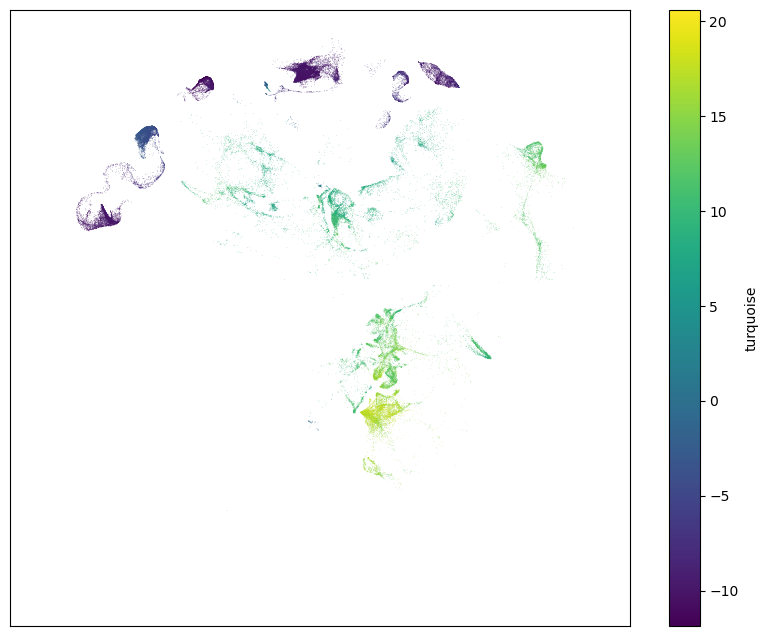

In [ ]:
plot_umap(merged_df, color_col="turquoise")

In [46]:
def plot_multiumap(data, x_col="x", y_col="y", start_col="region_of_interest_color", fig_width=8, fig_height=8, cmap="viridis"):
    """
    Plots UMAP visualizations for all columns after a specified starting column in a single figure with subplots.

    Parameters:
        data (pd.DataFrame): The dataframe containing UMAP coordinates and the columns to color.
        x_col (str): Column name for the x-axis UMAP coordinate.
        y_col (str): Column name for the y-axis UMAP coordinate.
        start_col (str): Column name to start plotting from (inclusive).
        fig_width (float): Width of the entire figure.
        fig_height (float): Height of the entire figure.
        cmap (str): Colormap for the scatter plots.

    Returns:
        None
    """
    start_index = data.columns.get_loc(start_col)
    color_columns = data.columns[start_index:]

    # Calculate the number of rows and columns for subplots
    n_cols = 4
    n_rows = math.ceil(len(color_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width * n_cols / 4, fig_height * n_rows / 4))
    axes = axes.flatten()

    for i, color_col in enumerate(color_columns):
        ax = axes[i]

        # Ensure the column has numeric values for color mapping
        if data[color_col].dtype.kind in 'iufc':  # Check for numeric types
            scatter = ax.scatter(
                data[x_col],
                data[y_col],
                s=0.5,
                c=data[color_col],
                cmap=cmap,
                marker='.',
                edgecolor='none'
            )

            # Add a colorbar
            cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
            cbar.ax.tick_params(labelsize=6)
        else:
            scatter = ax.scatter(
                data[x_col],
                data[y_col],
                s=0.5,
                color='grey',
                marker='.',
                edgecolor='none'
            )

        # Adjust axis aspect ratio
        ax.set_aspect('auto')

        # Remove axis ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Set title
        ax.set_title(color_col, fontsize=8)

    # Turn off unused subplots
    for ax in axes[len(color_columns):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



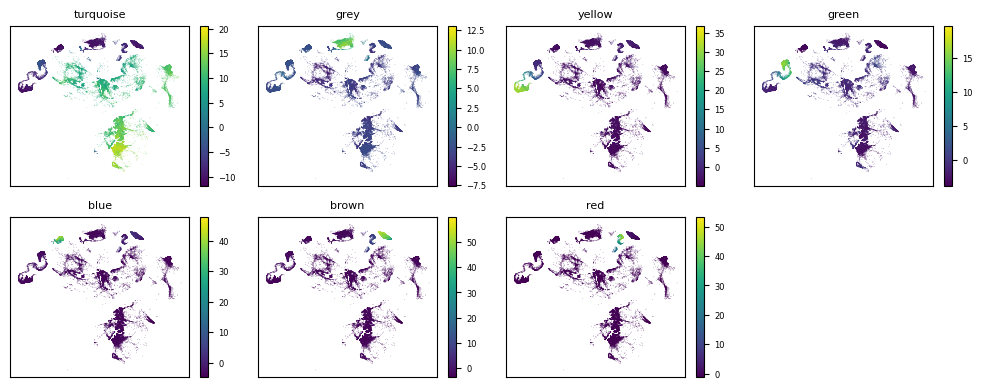

In [47]:
plot_multiumap(merged_df, start_col="turquoise", fig_width=10, fig_height=8)